# Dec ??th, 2022 (SLC: Saba plot)

**Motivation**: make a self contained notebook for Saba to plot stuff <br>

In [1]:
# HIDE CODE


import os
import sys
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from scipy.ndimage import gaussian_filter
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = pjoin(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

In [2]:
mice = Mice(512)

In [31]:
len(mice.node_lookup['bold'])

3068

In [32]:
cortex = mice.parcel['cortex'][mice.parcel['cortex'].nonzero()]
cortex = np.unique(cortex)
len(cortex)

3066

In [33]:
cortex

array([   1,    2,    3, ..., 3070, 3071, 3072], dtype=uint32)

In [34]:
subcortex = mice.parcel['subcortex'][mice.parcel['subcortex'].nonzero()]
subcortex = np.unique(subcortex)
len(subcortex)

155

In [35]:
subcortex

array([    7,    15,    27,    56,    59,    63,    64,    88,    91,
          96,   101,   105,   114,   122,   127,   131,   141,   149,
         155,   157,   159,   170,   178,   181,   186,   188,   196,
         204,   210,   218,   250,   255,   258,   260,   262,   266,
         278,   290,   298,   303,   310,   311,   319,   323,   325,
         333,   339,   340,   342,   348,   349,   362,   365,   366,
         370,   382,   414,   422,   423,   429,   437,   445,   451,
         463,   475,   483,   491,   502,   507,   513,   515,   525,
         538,   539,   557,   564,   566,   572,   575,   579,   581,
         583,   587,   589,   595,   596,   599,   609,   612,   629,
         632,   639,   642,   647,   651,   672,   685,   693,   711,
         718,   725,   733,   741,   754,   780,   788,   809,   814,
         843,   846,   867,   903,   907,   918,   920,   926,   928,
         930,   936,   942,   944,   946,   951,   957,   961,   968,
         980,   987,   989,   998,  1004,  1007,  1017,  1020,  1022,
        1025,  1029,  1031,  1033,  1037,  1041,  1049,  1077,  1084,
        1113,  1117,  1181,  1190,  1340,  1348,  1384,  1468,  1477,
       10703, 10704], dtype=uint32)

In [36]:
xx = 'Symmetric_N162_space-indiv3d_cortex.nii.gz'
xx = ants.image_read(xx, pixeltype='unsigned int').numpy()
x = np.unique(xx[xx.nonzero()])
len(x)

2604

In [37]:
x

array([   1,    2,    3, ..., 3062, 3064, 3067], dtype=uint32)

In [38]:
pd.DataFrame({'id': x}).to_csv('cortex.csv')

<matplotlib.image.AxesImage object at 0x7f8997ac2a90>

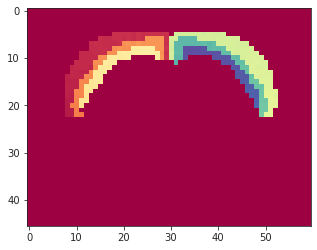

In [40]:
plt.imshow(xx[:, :, 50].T, cmap='Spectral')

In [41]:
xx = 'Symmetric_N162_space-indiv3d_subcortex-l.nii.gz'
xx = ants.image_read(xx, pixeltype='unsigned int').numpy()
x = np.unique(xx[xx.nonzero()])
len(x)

153

In [42]:
x

array([    7,    15,    27,    56,    59,    63,    64,    88,    91,
          96,   101,   105,   114,   122,   127,   131,   141,   149,
         155,   157,   159,   170,   178,   181,   186,   188,   196,
         204,   210,   218,   250,   255,   258,   260,   262,   266,
         278,   290,   298,   303,   310,   311,   319,   323,   325,
         333,   339,   340,   342,   348,   349,   362,   366,   370,
         382,   414,   422,   429,   437,   445,   451,   463,   475,
         483,   491,   502,   507,   513,   515,   525,   538,   539,
         557,   564,   566,   572,   575,   579,   581,   583,   587,
         589,   595,   596,   599,   609,   612,   629,   632,   639,
         642,   647,   651,   672,   685,   693,   711,   718,   725,
         733,   741,   754,   780,   788,   809,   814,   843,   846,
         867,   903,   907,   918,   920,   926,   928,   930,   936,
         942,   944,   946,   951,   957,   961,   968,   980,   987,
         989,   998,  1004,  1007,  1017,  1020,  1022,  1025,  1029,
        1031,  1033,  1037,  1041,  1049,  1077,  1084,  1113,  1117,
        1181,  1190,  1340,  1348,  1384,  1468,  1477, 10703, 10704],
      dtype=uint32)

In [43]:
pd.DataFrame({'id': x}).to_csv('subcortex.csv')

<matplotlib.image.AxesImage object at 0x7f89978dbee0>

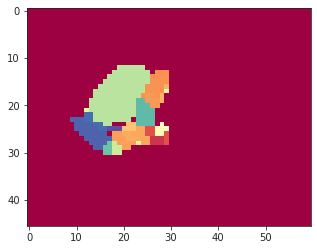

In [44]:
plt.imshow(xx[:, :, 50].T, cmap='Spectral')

In [11]:
pd.DataFrame({'id': cortex}).to_csv('cortex.csv')
pd.DataFrame({'id': subcortex}).to_csv('subcortex.csv')

In [8]:
subcortex

array([    7,    15,    27,    56,    59,    63,    64,    88,    91,
          96,   101,   105,   114,   122,   127,   131,   141,   149,
         155,   157,   159,   170,   178,   181,   186,   188,   196,
         204,   210,   218,   250,   255,   258,   260,   262,   266,
         278,   290,   298,   303,   310,   311,   319,   323,   325,
         333,   339,   340,   342,   348,   349,   362,   365,   366,
         370,   382,   414,   422,   423,   429,   437,   445,   451,
         463,   475,   483,   491,   502,   507,   513,   515,   525,
         538,   539,   557,   564,   566,   572,   575,   579,   581,
         583,   587,   589,   595,   596,   599,   609,   612,   629,
         632,   639,   642,   647,   651,   672,   685,   693,   711,
         718,   725,   733,   741,   754,   780,   788,   809,   814,
         843,   846,   867,   903,   907,   918,   920,   926,   928,
         930,   936,   942,   944,   946,   951,   957,   961,   968,
         980,   987,   989,   998,  1004,  1007,  1017,  1020,  1022,
        1025,  1029,  1031,  1033,  1037,  1041,  1049,  1077,  1084,
        1113,  1117,  1181,  1190,  1340,  1348,  1384,  1468,  1477,
       10703, 10704], dtype=uint32)

In [16]:
mice.al.get(572)

{
    'acronym': 'ACA1',
    'graph_id': 1,
    'graph_order': 221,
    'id': 572,
    'name': 'Anterior cingulate area, layer 1',
    'structure_id_path': [997, 8, 567, 688, 695, 315, 31, 572],
    'structure_set_ids': [],
    'rgb_triplet': [64, 166, 102]
}

In [9]:
m = mice.parcel['subcortex'] == 572

<matplotlib.image.AxesImage object at 0x7f47a401d370>

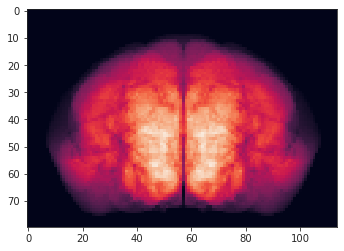

In [14]:
plt.imshow((mice.parcel['subcortex'] != 0).mean(0))

<matplotlib.image.AxesImage object at 0x7f47a464da60>

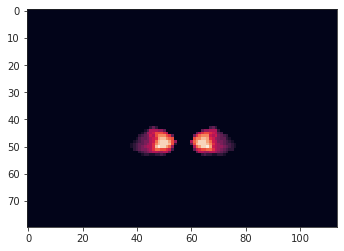

In [13]:
plt.imshow(m.mean(0))

In [6]:
path = '/home/hadi/Downloads/ca_average'
x = np.load(pjoin(path, 'sub_SLC06ca_rest.npy'))

In [8]:
x.shape

(540, 110)

In [9]:
len(lookup['ca2'])

540

In [5]:
mice = Mice(512)

In [12]:
bs = Base(mice, mode='ca2')

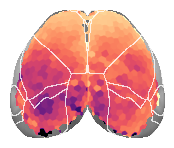

In [38]:
_ = bs.show(x[:, 20], vmin=-100, vmax=0)

<AxesSubplot:ylabel='Count'>

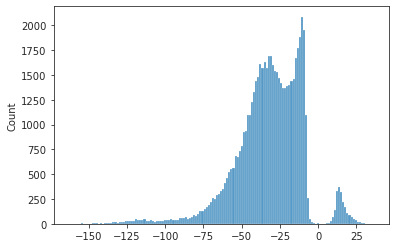

In [33]:
sns.histplot(x.ravel())

## Project

In [77]:
proj = bs.project_vec(x.T, layer=0, add_disjoint=False)
list(proj), proj['top'].shape

(['top', 'flat'], (110, 1320, 1140))

<matplotlib.image.AxesImage object at 0x7fbe633bc100>

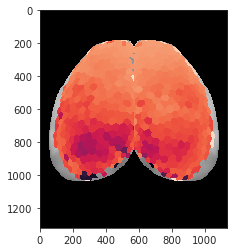

In [81]:
plt.imshow(top, cmap='Greys_r')
plt.imshow(mwh(mask_topview == 0, proj['top'][40]))

In [75]:
parcel_top, parcel_flat = mice.parcel.load_top_flat()
regions = [mice.parcel.encode(r) for r in lookup['ca2'].values()]
mask_topview = np.isin(parcel_top, regions)
np.save('topview_mask.npy', mask_topview)

In [76]:
top, flat = bs.load_top_flat()
np.save('topview.npy', top)

## Do one BOLD example

In [84]:
path = '/home/hadi/Downloads/bold average'
x = np.load(pjoin(path, 'sub_SLC08_bold_rest.npy'))
x.shape

(3068, 11)

In [87]:
subset_idxs = mice.get_subset_idxs('surface')
len(subset_idxs)

540

In [88]:
x = x[subset_idxs]
x.shape

(540, 11)

In [89]:
proj = bs.project_vec(x.T, layer=0, add_disjoint=False)
list(proj), proj['top'].shape

(['top', 'flat'], (11, 1320, 1140))

<matplotlib.image.AxesImage object at 0x7fbd36571760>

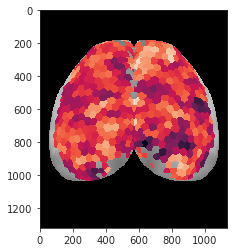

In [98]:
plt.imshow(top, cmap='Greys_r')
plt.imshow(mwh(mask_topview == 0, proj['top'][6]))